In [1]:
import os
os.environ["OMP_NUM_THREADS"] = '32'
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
import math
import sys
sys.path.append('../')
from pyfd3d import pyfd3d
from pyMKL import pardisoSolver
import pyfd3d.fd3d as fd3d
from scipy.sparse.linalg import qmr, bicgstab

## Recall:
a dipole source in the z direction J_z cannot radiate in the z direction.

In [2]:
L0 = 1e-6;  #length unit: microns
wvlen = 0.35;  # wavelength in L0

Npml = 1*np.array([0,0,15]);  # [Nx_pml Ny_pml]
xrange = 0.5*np.array([-1, 1]);  # x boundaries in L0
yrange = 0.5*np.array([-1, 1]);  # y boundaries in L0
zrange = 0.5*np.array([-1, 1]);
N = np.array([91, 91, 91])
x = np.linspace(xrange[0], xrange[1], N[0])
y = np.linspace(yrange[0], yrange[1], N[1])
z = np.linspace(zrange[0], zrange[1], N[2])

[XX,YY,ZZ] = np.meshgrid(x,y,z)
print(N)

[91 91 91]


In [3]:
eps_r = np.ones(N);
Jz = np.zeros(N); 
Jy = np.zeros(N);
Jx = np.zeros(N);
Jx[:,:,20] = 1;
Jy[:,:,20] = 1
eps_r_tensor_dict = {
    'eps_xx': eps_r,
    'eps_yy': eps_r.copy(),
    'eps_zz': eps_r.copy(),
}
JCurrentVector = {
    'Jx': Jx,
    'Jy': Jy,
    'Jz': Jz
}


In [4]:
print(wvlen, xrange,zrange, L0,N, eps_r.shape)

0.35 [-0.5  0.5] [-0.5  0.5] 1e-06 [91 91 91] (91, 91, 91)


In [5]:
A,b, Ch = fd3d.curlcurlE(L0, 
                         wvlen, 
                         xrange, 
                         yrange, 
                         zrange, 
                         eps_r_tensor_dict, 
                         JCurrentVector,Npml, 
                         s = -1
                        )

(2260713,)


In [6]:
#symmetrizer
# Sxf, Syf, Szf, Sxb, Syb, Szb =  create_sc_pml(omega, dL, N, Npml, eps0, eta0)
# Pl, Pr = create_symmetrizer(Sxf, Syf, Szf, Sxb, Syb, Szb)



In [7]:
%%time
#x, info = qmr(A, b, maxiter = 2000)
x, info = bicgstab(A,b, maxiter = 2000);
print(info)

0
CPU times: user 23min 34s, sys: 30 s, total: 24min 4s
Wall time: 3min 5s


In [8]:
y = Ch@x
print(y.shape, A.shape)

(2260713,) (2260713, 2260713)


In [9]:
# flipped Ez looks like Ey, Ey looks like Ex, Ex looks like Ez
M = np.prod(N);
Ex = x[0:M].reshape(N, order = 'F');
Ey = x[M:2*M].reshape(N, order = 'F')
Ez = x[2*M:].reshape(N, order = 'F')

Hx =  y[0:M].reshape(N, order = 'F')
Hy =  y[M:2*M].reshape(N, order = 'F')
Hz =  y[2*M:].reshape(N, order = 'F')



<ipython-input-10-4834dd010ac8>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


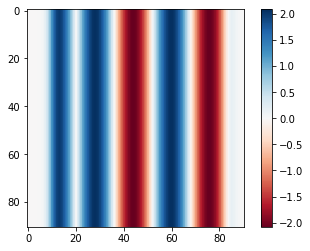

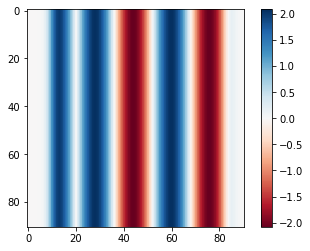

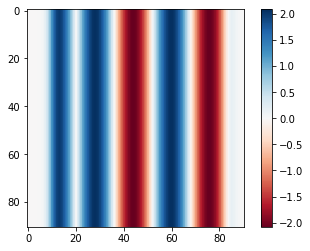

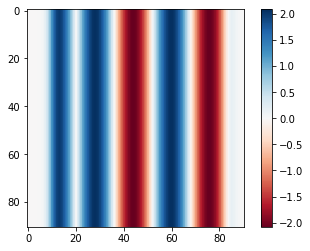

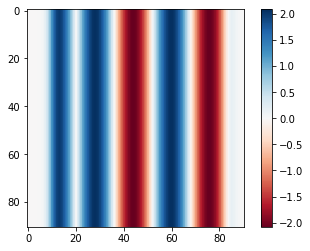

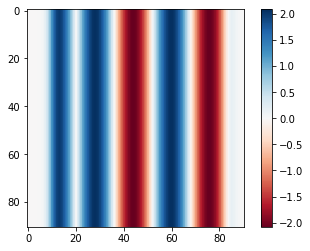

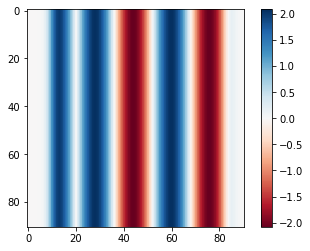

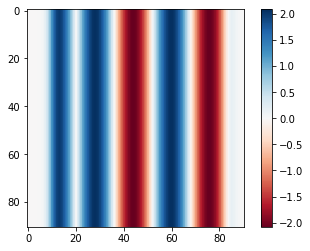

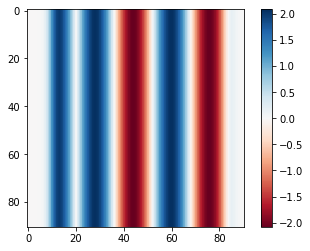

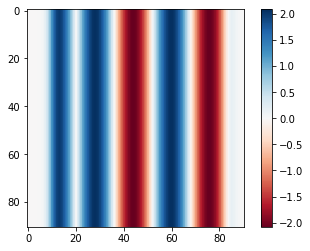

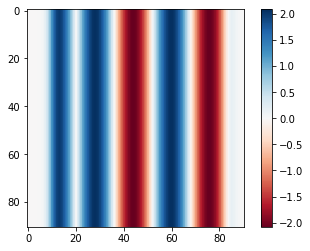

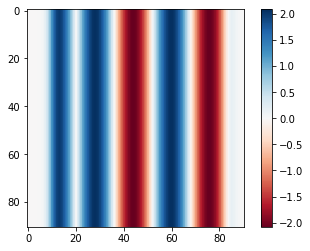

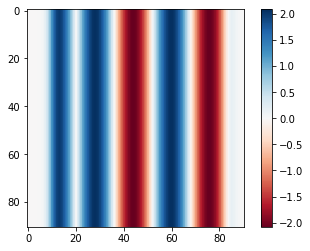

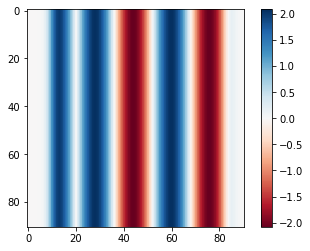

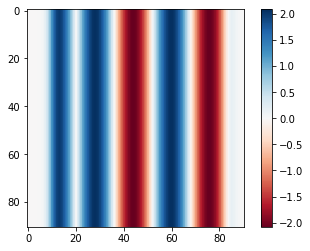

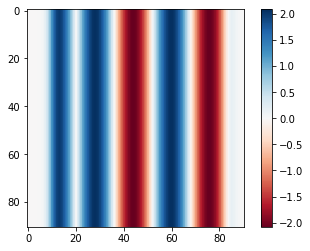

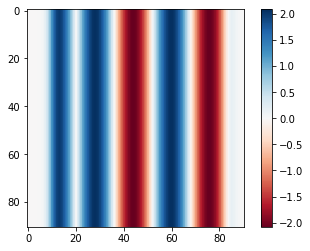

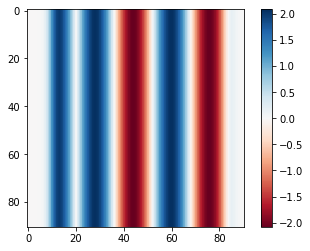

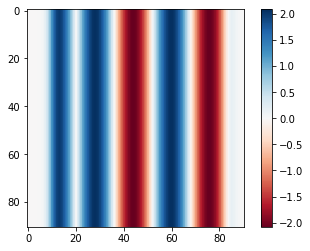

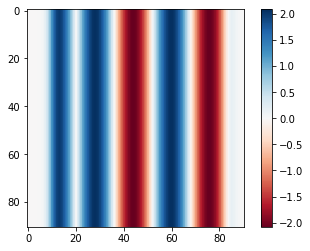

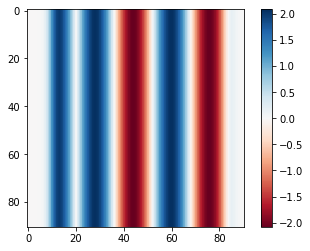

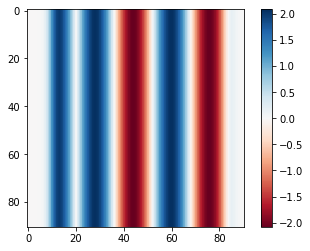

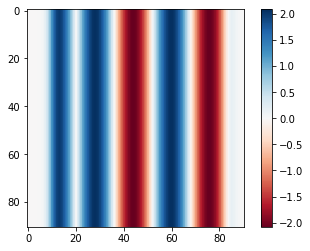

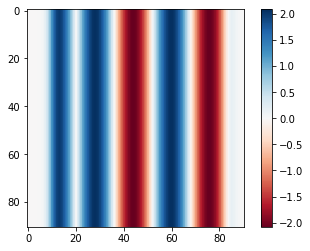

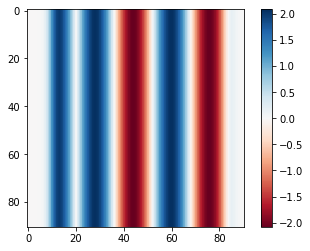

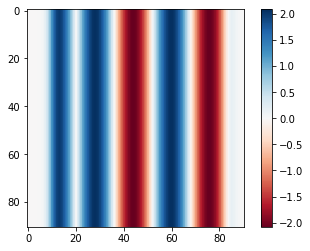

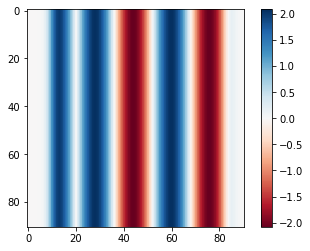

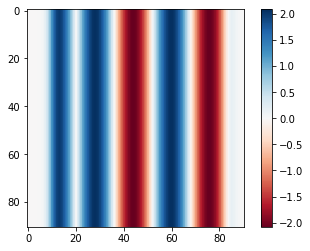

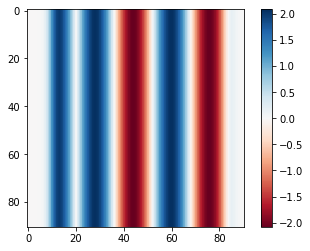

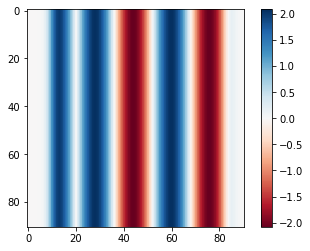

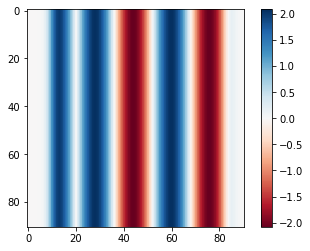

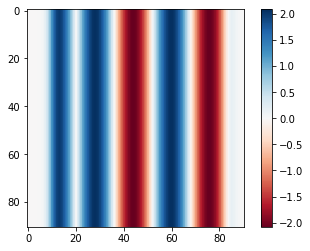

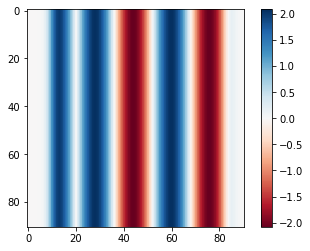

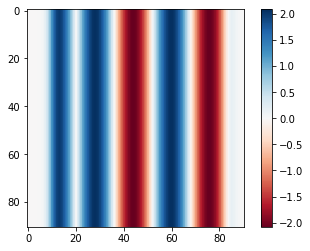

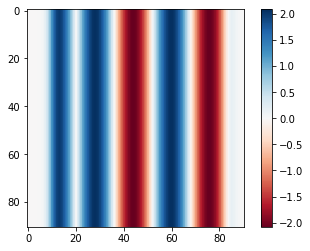

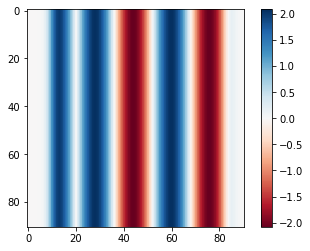

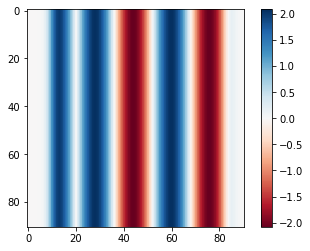

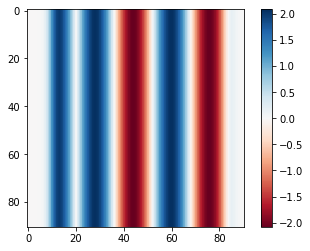

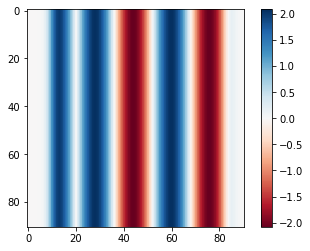

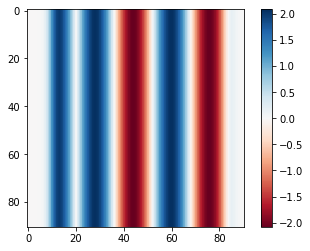

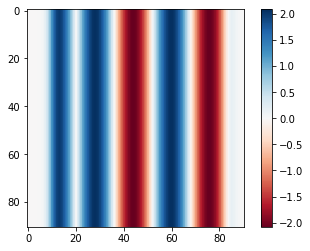

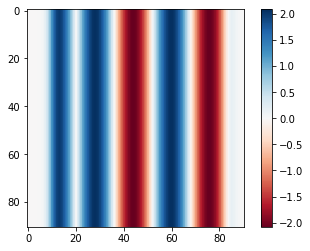

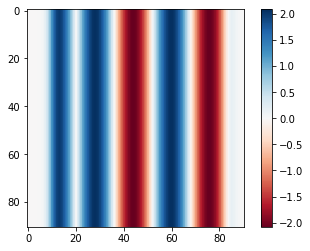

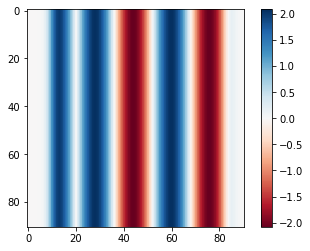

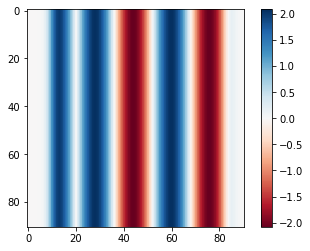

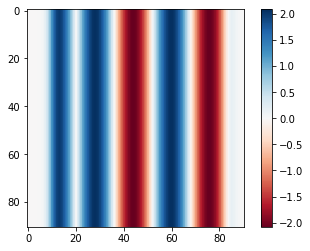

In [10]:
for i in range(0,N[0],2):
    plt.figure()
    plt.imshow(np.imag(Ey[:,i,:]), cmap = 'RdBu')
    #plt.clim(0,0.5e-2)
    plt.colorbar()
    

<ipython-input-11-d5c487fdf03a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


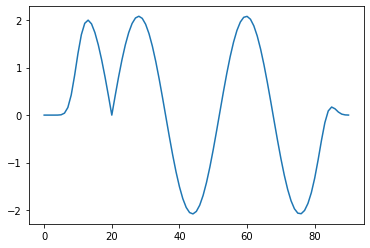

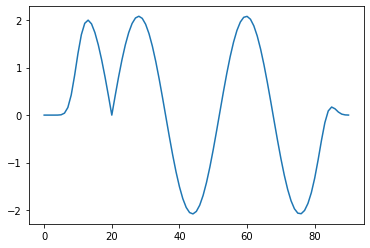

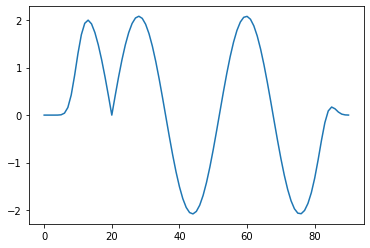

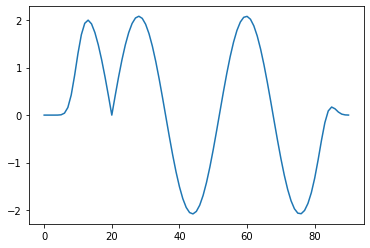

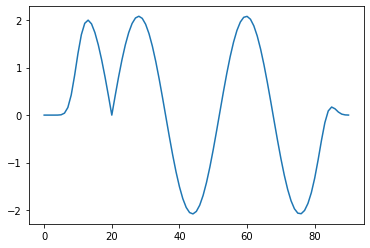

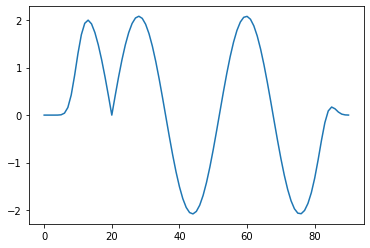

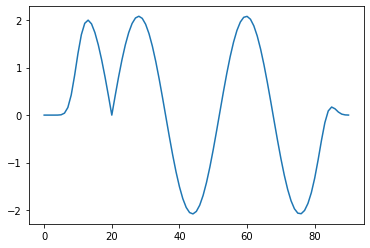

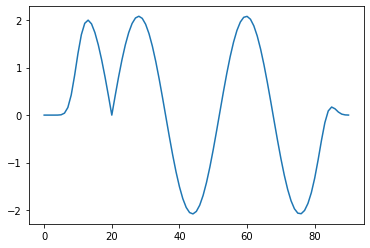

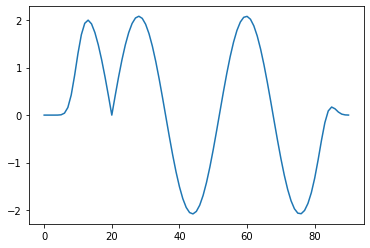

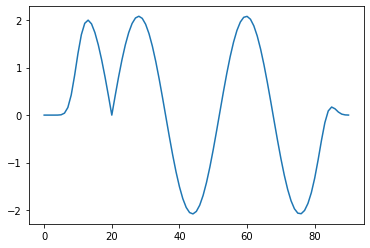

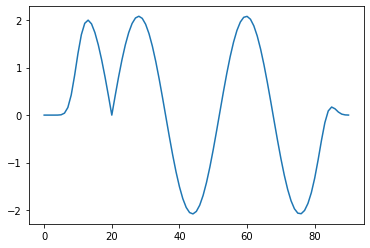

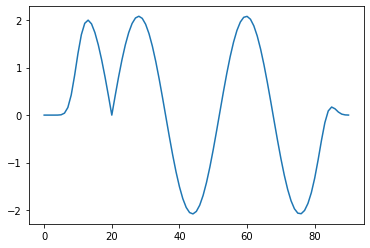

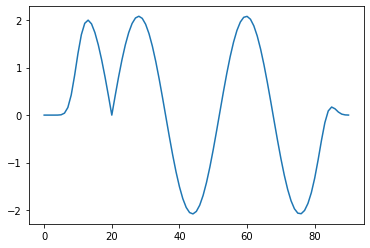

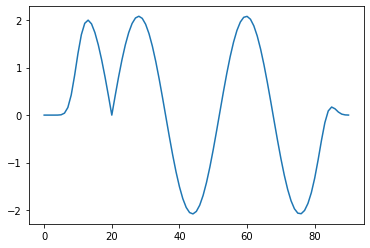

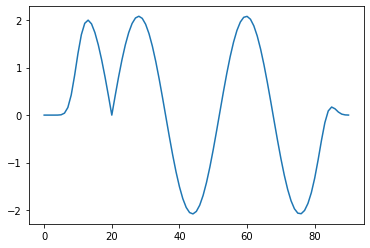

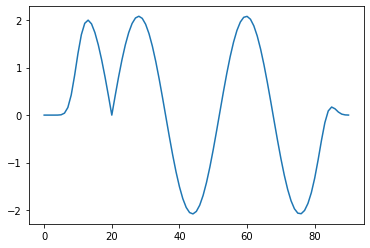

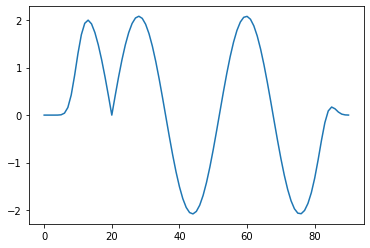

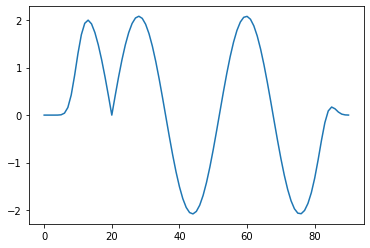

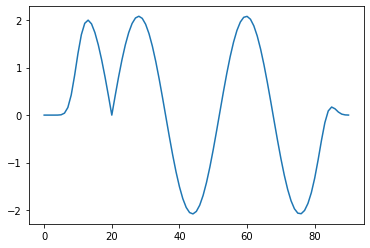

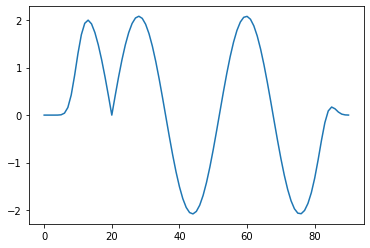

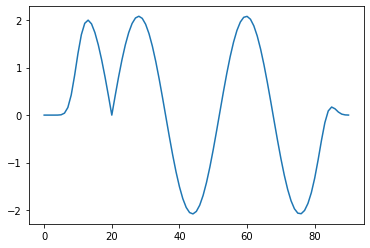

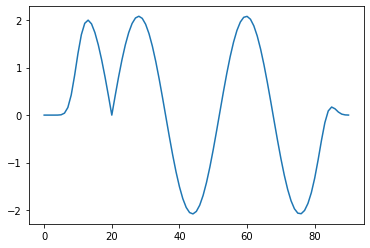

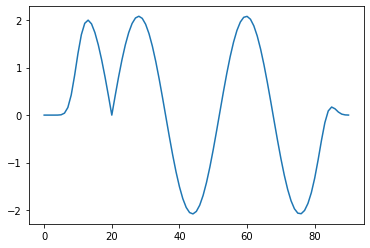

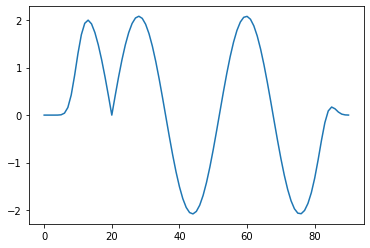

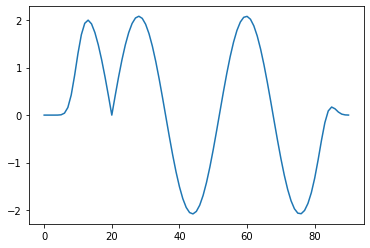

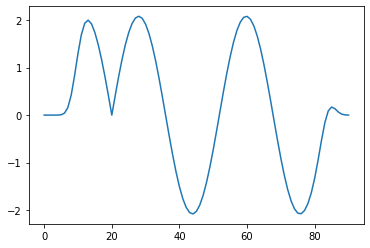

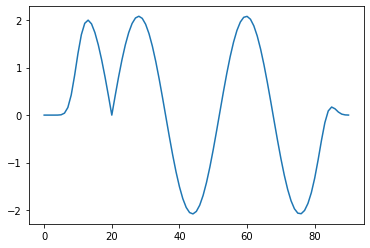

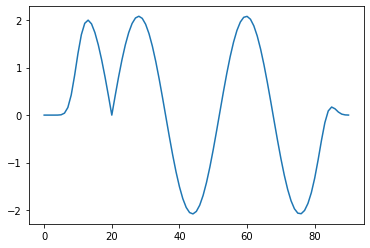

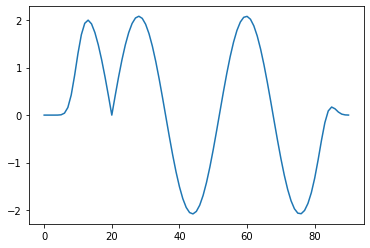

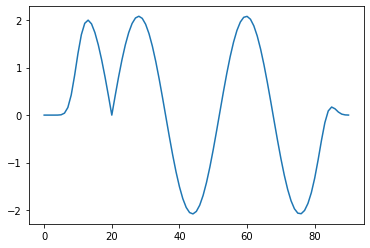

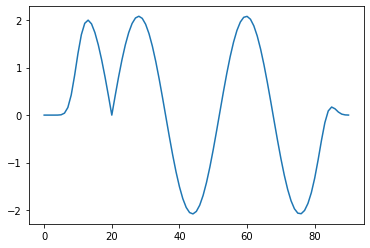

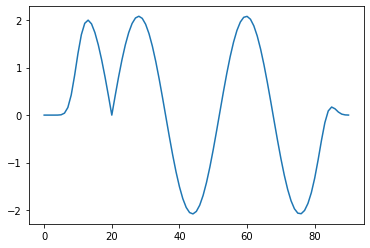

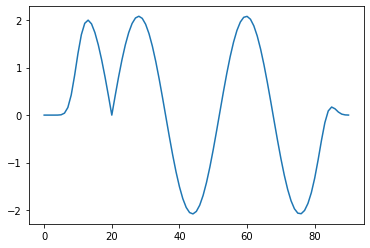

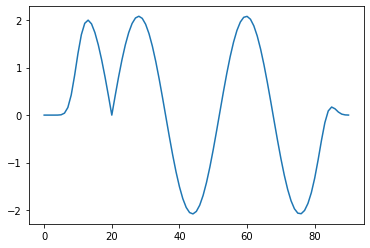

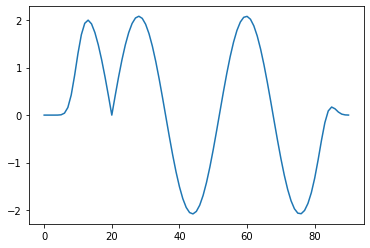

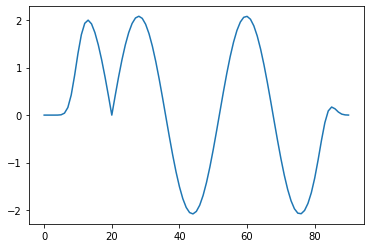

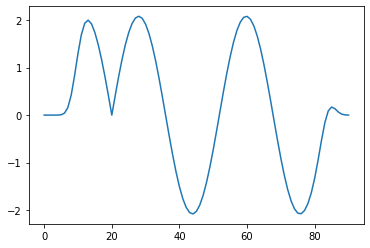

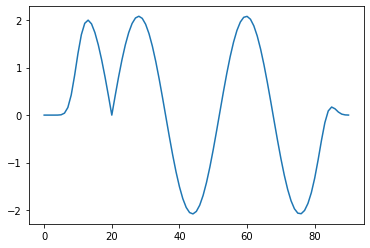

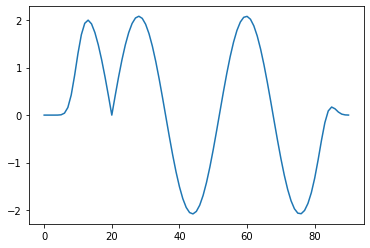

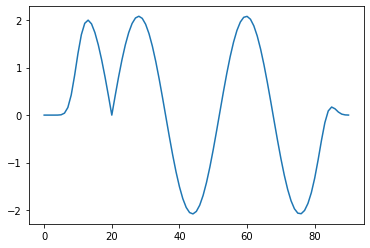

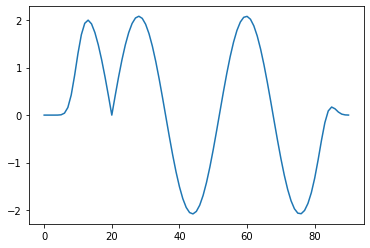

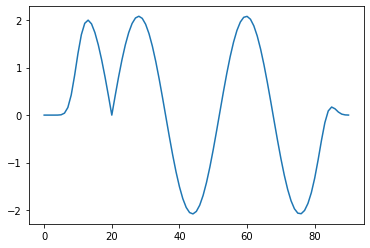

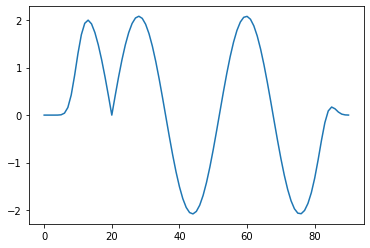

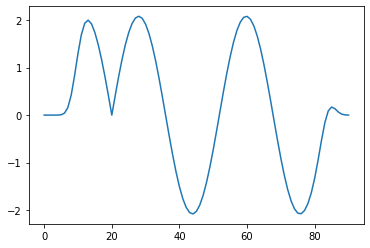

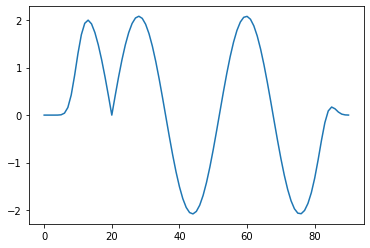

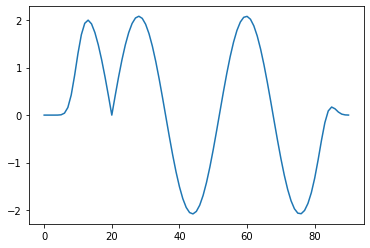

In [11]:
for i in range(0,N[0],2):
    plt.figure()
    plt.plot(np.imag(Ey[i,25,:]))
    #plt.ylim(-1e-2,1e-2)


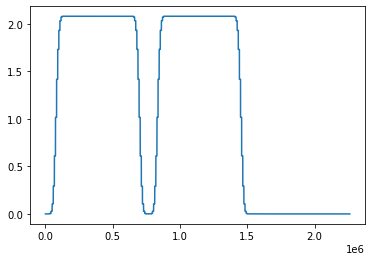

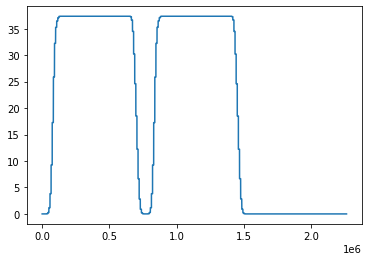

In [12]:
plt.plot(np.abs(x))
plt.figure()
plt.plot(np.abs(y))